In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')

import shutil
from train import run
import os
import itertools
import glob

def write_errormsg2file(msg, error_file_name):
    if not os.path.isfile(error_file_name):
        with open(error_file_name, 'w') as f:
            f.write(f'error : {msg}\n')
    else:
        with open(error_file_name, 'a') as f:
            f.write(f'error : {msg}\n')
            
def do_exps(exps_dict= None, general_opts= None, device= None, exp_dir = '../figs/test', save_special= False):    
    exp_idx = 0
    keys= list(exps.keys())
    
    val_list_list= []
    key_list = [] #eg: 'MODEL.MODEL_A.rotation_lambda'
    key_suffix_list= [] # eg: 'rotation_lambda'
    
    for key, val_list in exps_dict.items():
        key_list.append(key)
        key_suffix_list.append(key.split('.')[-1])
        
        val_list_list.append(val_list)
        
    attr_combination_list = [list(s) for s in itertools.product(*val_list_list)]
    
    print(f'number of total experiments : {len(attr_combination_list)}')
    
    count_already_trained=0
    count_train_from_begining=0
    for attr_combination in attr_combination_list:
        save_dir = f'{exp_dir}/'
        opts= []
        for idx in range(len(attr_combination)):
            opts += [key_list[idx], attr_combination[idx]]
            attr= attr_combination[idx]
            
            #####
            attr_is_list= False
            try:attr_is_list = isinstance(eval(attr), list)
            except:pass
            if attr_is_list:
                attr= '_'.join(list(map(str, eval(attr)))) ## [, ] should not be in the directory name because glob is sensitive to that !
            #####
            
            save_dir+= f'{key_suffix_list[idx]}({attr})@'
    
        save_dir = save_dir[:-1] # remove last '@' 

        exp_idx+=1
        opts_other= ['NAME', f'exp_idx({exp_idx})', 
                     'GENERAL.device', device, 
                     'GENERAL.save_dir', save_dir
                    ]
                     
        opts_other+= general_opts

        opts = opts_other + opts

        
        if len(glob.glob(f'{save_dir}/1_*.jpg'))!=0:
            count_already_trained+=1
            continue
        
        count_train_from_begining+=1
                    
        try:shutil.rmtree(save_dir)
        except:pass

        save_folder_name= save_dir.split('/')[-1]
        if len(save_folder_name)>255:
            print(f'\nFolder length is too long: len(results_saving_folder) -> {len(save_folder_name)} (<= 255)')
            print(save_folder_name)
        
        #run(opts= opts, save_special=save_special)
        try:
            run(opts= opts, save_special=save_special)
        except:
            error_file_name = f'{exp_dir}/errors.txt'
            write_errormsg2file(f'ERROR : {save_dir}', error_file_name)
            print(f'ERROR : {save_dir}')
    print('count_already_trained : ', count_already_trained)
    print('count_train_from_begining : ', count_train_from_begining)

In [3]:
exp_dir= '../figs/mnistv19'
!rm -rf $exp_dir
!mkdir $exp_dir

number of total experiments : 10
Overide opts :  ['NAME', 'exp_idx(1)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/mnistv19/num_samples_train(50)@upsample_net_init_method(xavier_normal)@upsample_net(custom_v4)@lr_H(0.0)', 'TRAIN.show_results_epoch', '1', 'TRAIN.epochs', '1', 'MODEL.MODEL_A.lambda_scale_factor', '4', 'MODEL.MODEL_A.rotation_lambda', '10000.0', 'MODEL.MODEL_H.T', '8', 'DATASET.img_size', '128', 'MODEL.MODEL_H.H_init', 'randn_FourierBased', 'MODEL.MODEL_DECODER.name', 'genv1', 'MODEL.MODEL_DECODER.channel_list', '[24, 12, 8, 4, 2]', 'DATASET.name', 'mnistdigits_grid2patch', 'DATASET.num_samples_train', '50', 'MODEL.MODEL_DECODER.upsample_net_init_method', 'xavier_normal', 'MODEL.MODEL_DECODER.upsample_net', 'custom_v4', 'MODEL.MODEL_H.lr_H', '0.0']
DATASET:
  batch_size_train: 32
  delta: 1e-06
  img_channels: 1
  img_size: 128
  name: mnistdigits_grid2patch
  num_samples_train: 50
GENERAL:
  device: cuda:0
  save_dir: ../figs/mnistv19/num_samples_train(50)@

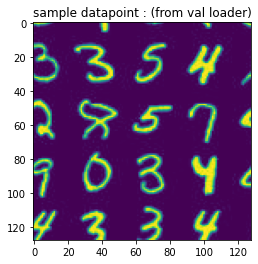

dataset value range :  9.999001804317231e-07 0.9999000430107117
device : cuda:0
m : 1
yt range (train): [2.607506758067757e-05 35.38557815551758]
yt range (test): [2.607506758067757e-05 32.78828430175781]
training loop time (for epoch: 1): 0.9637207984924316 sec
validation loop time (for epoch: 1): 11.861488342285156 sec




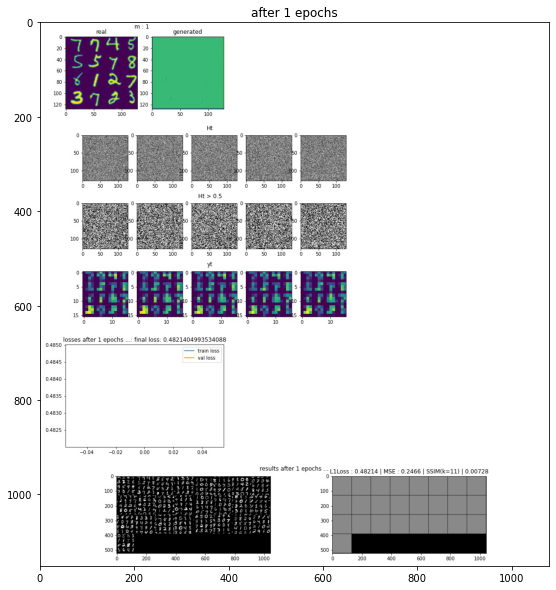

Overide opts :  ['NAME', 'exp_idx(2)', 'GENERAL.device', 'cuda:0', 'GENERAL.save_dir', '../figs/mnistv19/num_samples_train(50)@upsample_net_init_method(xavier_normal)@upsample_net(custom_v4)@lr_H(1.0)', 'TRAIN.show_results_epoch', '1', 'TRAIN.epochs', '1', 'MODEL.MODEL_A.lambda_scale_factor', '4', 'MODEL.MODEL_A.rotation_lambda', '10000.0', 'MODEL.MODEL_H.T', '8', 'DATASET.img_size', '128', 'MODEL.MODEL_H.H_init', 'randn_FourierBased', 'MODEL.MODEL_DECODER.name', 'genv1', 'MODEL.MODEL_DECODER.channel_list', '[24, 12, 8, 4, 2]', 'DATASET.name', 'mnistdigits_grid2patch', 'DATASET.num_samples_train', '50', 'MODEL.MODEL_DECODER.upsample_net_init_method', 'xavier_normal', 'MODEL.MODEL_DECODER.upsample_net', 'custom_v4', 'MODEL.MODEL_H.lr_H', '1.0']
DATASET:
  batch_size_train: 32
  delta: 1e-06
  img_channels: 1
  img_size: 128
  name: mnistdigits_grid2patch
  num_samples_train: 50
GENERAL:
  device: cuda:0
  save_dir: ../figs/mnistv19/num_samples_train(50)@upsample_net_init_method(xavier_n

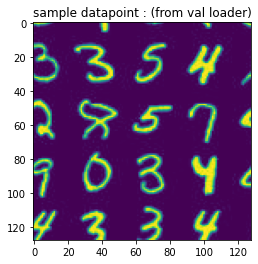

dataset value range :  9.999001804317231e-07 0.9999000430107117
device : cuda:0
m : 1
yt range (train): [2.607506758067757e-05 35.38557815551758]


In [ ]:
device = 'cuda:0'

exps = {
    'DATASET.num_samples_train': ['50'], #['600', '6000', '60000'], 
    'MODEL.MODEL_DECODER.upsample_net_init_method': ['xavier_normal'], #custom_v3, v4: no initializations needed !!! (only custom_v2 need an initialization method)
    'MODEL.MODEL_DECODER.upsample_net': ['custom_v4', 'custom_v3', 'custom_v2', 'learnable_transpose_conv', 'bicubic_interp'],    
    'MODEL.MODEL_H.lr_H': ['0.0', '1.0']}

general_opts= ['TRAIN.show_results_epoch', '1',
               'TRAIN.epochs', '1',
               
               'MODEL.MODEL_A.lambda_scale_factor', '4',
               'MODEL.MODEL_A.rotation_lambda', '10000.0',
               'MODEL.MODEL_H.T', '8',
               'DATASET.img_size', '128',
               'MODEL.MODEL_H.H_init', 'randn_FourierBased',
               'MODEL.MODEL_DECODER.name', 'genv1',
               'MODEL.MODEL_DECODER.channel_list', '[24, 12, 8, 4, 2]',
               'DATASET.name', 'mnistdigits_grid2patch',
              ]

do_exps(exps, general_opts, device, exp_dir = exp_dir, save_special= False)